## IMPORTS

In [22]:
import sys
import os
import pandas as pd

import matplotlib.pyplot as plt
from top2vec import Top2Vec


## INPUTS & OUTPUTS

In [24]:
# ------ #
# INPUTS #
# ------ #
with open('../config/repository_path.txt', 'r') as reader:
    repository_path = reader.read()

sys.path.append(repository_path)

periods = pd.read_csv(os.path.join(repository_path, 'data', 'periods.csv'))


suggestions_file = os.path.join(repository_path, 'data', f'suggestions_n=2759.csv')

# ------ #
# OUTPUT #
# ------ #
output_suggestions_file = os.path.join(repository_path, 'data', f'suggestions_topics0.csv')

top2vec_model_file = os.path.join(repository_path, 'data', 'deep_model_topic0.noextension')
output_df_file = os.path.join(repository_path, 'data', 'topics_sheet_topic0.csv')


## CUSTOM IMPORTS

In [3]:
from lib import tdmstudio

## SELECT TOPIC 0 FROM ALL SUGGESTIONS

In [4]:
suggestions = pd.read_csv(suggestions_file)
topic0 = suggestions[suggestions['top2vec']==0]
topic0

,id,score,date,period,doc_dist,title,top2vec
0,1288730434,1.000000,1959-12-18,5,0.293814,Refugees Could Be Valuable Assets.,0
4,1125693800,1.000000,2001-09-04,7,0.144563,Time for a fresh look at the state of refuge.,0
6,1288727537,1.000000,1959-12-17,5,0.269246,Our Responsibility to the Refugees.,0
8,1444926563,1.000000,2010-08-24,8,0.142957,"Immigrants, refugees.",0
12,1143646857,1.000000,1997-09-02,7,0.207817,Refugees and immigration.,0
...,...,...,...,...,...,...,...
2833,1239269013,0.356189,1979-07-26,7,0.181256,Report warns of 'nightmare' in refugee jam.,0
2840,1125457794,0.356011,2000-11-21,7,0.124898,Just what was said.,0
2842,1288816177,0.355913,1958-10-14,5,0.296342,Let Them Remain.,0
2844,1125778135,0.355889,2001-10-26,7,0.181959,Who's fanning what?.,0


## ADDING TEXT AND RELEVANT_OR_SUGGESTED COLUMN

In [6]:
topic0.insert(loc=topic0.shape[1], 
              column='text', 
              value= list(map(lambda id_: tdmstudio.get_title_and_text(tdmstudio.get_filename(str(id_))), topic0['id'])))
topic0.insert(loc=topic0.shape[1], 
              column='relevant_or_suggested', 
              value= ['rel' if score==1 else 'sugg' for score in topic0['score']])

topic0

,id,score,date,period,doc_dist,title,top2vec,text,relevant_or_suggested
0,1288730434,1.000000,1959-12-18,5,0.293814,Refugees Could Be Valuable Assets.,0,Refugees Could Be Valuable Assets.\n ...,rel
4,1125693800,1.000000,2001-09-04,7,0.144563,Time for a fresh look at the state of refuge.,0,Time for a fresh look at the state of refuge.\...,rel
6,1288727537,1.000000,1959-12-17,5,0.269246,Our Responsibility to the Refugees.,0,Our Responsibility to the Refugees.\n ...,rel
8,1444926563,1.000000,2010-08-24,8,0.142957,"Immigrants, refugees.",0,"Immigrants, refugees.\n \n ...",rel
12,1143646857,1.000000,1997-09-02,7,0.207817,Refugees and immigration.,0,Refugees and immigration.\n \n ...,rel
...,...,...,...,...,...,...,...,...,...
2833,1239269013,0.356189,1979-07-26,7,0.181256,Report warns of 'nightmare' in refugee jam.,0,Report warns of 'nightmare' in refugee jam.\n ...,sugg
2840,1125457794,0.356011,2000-11-21,7,0.124898,Just what was said.,0,Just what was said.\n \n \...,sugg
2842,1288816177,0.355913,1958-10-14,5,0.296342,Let Them Remain.,0,Let Them Remain.\n \n \n\n...,sugg
2844,1125778135,0.355889,2001-10-26,7,0.181959,Who's fanning what?.,0,Who's fanning what?.\n \n ...,sugg


## COMPUTING TOPICS

In [7]:
if os.path.isfile(top2vec_model_file):
    deep_model = Top2Vec.load(top2vec_model_file)
else:
    print('Start training')
    deep_model = Top2Vec(documents=list(topic0['text']), speed='deep-learn', workers=1)
    print('End training')
    deep_model.save(top2vec_model_file)

## SIZES OF RESULTING TOPICS AND SAVING TO DISK (DOCS WITH TOPICS)


In [20]:
topic_sizes, topic_nums = deep_model.get_topic_sizes()
topic_words, word_scores, topic_nums = deep_model.get_topics()
print(topic_sizes)
print(len(topic_sizes))

topic0.insert(loc=topic0.shape[1], column='sub-top2vec', value= deep_model.doc_top)
topic0.insert(loc=topic0.shape[1], column='sub-doc_dist', value= deep_model.doc_dist)

# ---------- #
# SAVING CSV #
# ---------- #
topic0[['id', 'score', 'date', 'period', 'doc_dist', 'title', 'sub-top2vec','sub-doc_dist']].to_csv(output_suggestions_file,
                                                                                                     index=False)

topic0.head()

[236 177 125 102  98  78]
6


,id,score,date,period,doc_dist,title,top2vec,text,relevant_or_suggested,sub-top2vec,sub-doc_dist
0,1288730434,1.0,1959-12-18,5,0.293814,Refugees Could Be Valuable Assets.,0,Refugees Could Be Valuable Assets.\n ...,rel,2,0.156694
4,1125693800,1.0,2001-09-04,7,0.144563,Time for a fresh look at the state of refuge.,0,Time for a fresh look at the state of refuge.\...,rel,3,0.163997
6,1288727537,1.0,1959-12-17,5,0.269246,Our Responsibility to the Refugees.,0,Our Responsibility to the Refugees.\n ...,rel,4,0.151735
8,1444926563,1.0,2010-08-24,8,0.142957,"Immigrants, refugees.",0,"Immigrants, refugees.\n \n ...",rel,2,0.358734
12,1143646857,1.0,1997-09-02,7,0.207817,Refugees and immigration.,0,Refugees and immigration.\n \n ...,rel,0,0.116325


## SAVING RESULTING TOPICS 

In [13]:
## EVERYTHING ABOVE IS OLD
data = {'topic no.': [], 
        'size': [], 
        'relevant count': [], 
        'example': [], 
        'example(rel)':[], 
        'suggestions':[], 
        'relevants':[],
        'all ids':[],
        'suggestions (by relevance)': [],
       }
# topic_sizes, topic_nums = deep_model.get_topic_sizes()
# topic_words, word_scores, topic_nums = deep_model.get_topics()
for word_ix,_ in enumerate(topic_words[0]):
    data[f'word_{word_ix:03}']=[]

# all_data['top2vec']=deep_model.doc_top
# all_data['doc_dist']=deep_model.doc_dist

for ix in range(len(topic_nums)):
    # Topic number & size 
    data['topic no.'].append(topic_nums[ix])
    data['size'].append(topic_sizes[ix])
    
    # auxdf
    auxdf=topic0[topic0['sub-top2vec']==topic_nums[ix]]
    
    # Example highly relevant to topic
    data['example'].append('https://proquest.com/docview/'+str(auxdf.sort_values(by='sub-doc_dist',ascending=False)['id'].iloc[0]))
    
    # Suggestions IDs (sorted by topic)
#     print(auxdf.columns)
    suggestions_ids=auxdf[auxdf['relevant_or_suggested']=='sugg'].sort_values(by='sub-doc_dist',ascending=False)['id']
    data['suggestions'].append(';'.join([str(elem) for elem in suggestions_ids]))
    
    # ALL IDs (sorted by topic)
    all_ids=auxdf.sort_values(by='sub-doc_dist',ascending=False)['id']
    data['all ids'].append(';'.join([str(elem) for elem in all_ids]))
    
    # Suggestions IDs (by relevance)
    #NOT USED BECAUSE WE CANNOT RE RUN THIS SCRIPT, gives different topics 
    # and Serperi is already working with the other topics:
    # FOR THIS EXPERIMENTS WE CAN DO IT, WE COULDN'T FOR THE PREVIOUS ONE. THE ABOVE COMMENT IS COPY PASTED FROM OTHER
    # JUPYTER NOTEBOOK
    
    suggestions_ids=auxdf[auxdf['relevant_or_suggested']=='sugg'].sort_values(by='score',ascending=False)['id']
    data['suggestions (by relevance)'].append(';'.join([str(elem) for elem in suggestions_ids]))
    
    # Labelled as relevant IDs
    relevant_ids=auxdf[auxdf['relevant_or_suggested']=='rel'].sort_values(by='sub-doc_dist',ascending=False)['id']
    data['relevants'].append(';'.join([str(elem) for elem in relevant_ids]))
    
    
    # Filter auxdf to have only relevant (not suggestions)
    auxdf=auxdf[auxdf['relevant_or_suggested']=='rel']
    
    # Relevant example highly relevant to topic.
    if auxdf.shape[0]>0:
        data['example(rel)'].append('https://proquest.com/docview/'+str(auxdf.sort_values(by='sub-doc_dist',ascending=False)['id'].iloc[0]))
    else:
        data['example(rel)'].append('')
        
    # No. of relevant in topic
    data['relevant count'].append(auxdf.shape[0])
    
    # Words in topic
    for word_ix,word in enumerate(topic_words[ix]):
        data[f'word_{word_ix:03}'].append(word)

output_df = pd.DataFrame(data)
output_df.to_csv(output_df_file, index=False)
output_df

,topic no.,size,relevant count,example,example(rel),suggestions,relevants,all ids,suggestions (by relevance),word_000,...,word_040,word_041,word_042,word_043,word_044,word_045,word_046,word_047,word_048,word_049
0,0,236,2,https://proquest.com/docview/1351859938,https://proquest.com/docview/1325630351,1351859938;1366184213;1354578976;1356631349;13...,1325630351;1143646857,1351859938;1366184213;1354578976;1356631349;13...,1143646857;1351349699;1353772134;1325740211;13...,settlers,...,restrictions,settlement,wealth,merely,especially,commonwealth,increased,sir,much,regard
1,1,177,7,https://proquest.com/docview/1291488485,https://proquest.com/docview/1313856119,1291488485;1294158621;1291437153;1293023321;13...,1313856119;1354485059;1356010501;1287278214;13...,1291488485;1294158621;1291437153;1293023321;13...,1350808704;1287816582;1291469056;1323336396;13...,cp,...,session,weeks,resolution,told,immigration,aid,admission,regulations,night,european
2,2,125,4,https://proquest.com/docview/1142176154,https://proquest.com/docview/1143626894,1142176154;2122110789;1125778135;2459833020;12...,1143626894;1444926563;1288730434;1237316622,1142176154;2122110789;1125778135;2459833020;12...,1237221054;1323583934;1284696893;1238511652;12...,editor,...,us,send,discussion,white,why,status,hard,asylum,freedom,else
3,3,102,3,https://proquest.com/docview/1143982201,https://proquest.com/docview/1238721861,1143982201;1239269995;1125085639;1239722738;12...,1238721861;2122110458;1125693800,1143982201;1239269995;1125085639;1239722738;12...,2122196299;1270456727;1435665240;1134925035;12...,vietnamese,...,week,including,family,end,prime,ment,arrived,govern,commons,mail
4,4,98,4,https://proquest.com/docview/1284571892,https://proquest.com/docview/1284702203,1284571892;1284571431;1284748068;1284567156;12...,1284702203;1434908264;1288727537;1323641658,1284571892;1284571431;1284748068;1284567156;12...,1137466050;1325673309;1288727537;1325762363;13...,kong,...,learn,expressed,surely,responsibility,around,ask,am,ihe,second,us
5,5,78,0,https://proquest.com/docview/1354647351,,1354647351;1291581858;1356380596;1151445264;11...,,1354647351;1291581858;1356380596;1151445264;11...,1238534324;1326104065;1355052834;1325937273;12...,quebec,...,liberal,opinion,scheme,france,question,cp,conference,says,farmers,minister


## PLOTS PERIODS AND TOPICS

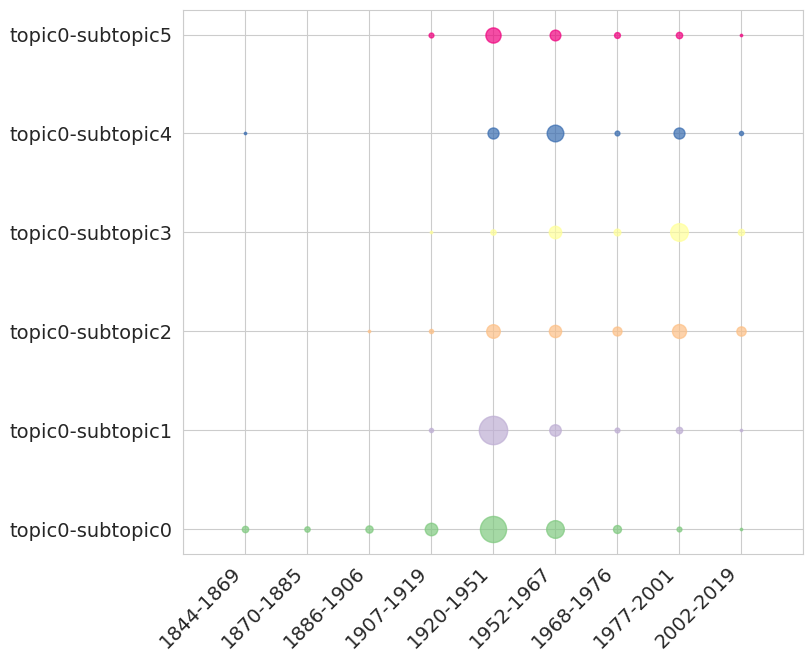

In [31]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, figsize=(8,8))

no_of_topics=len(set(topic0['sub-top2vec']))

colors = [(127,201,127),
          (190,174,212),
          (253,192,134),
          (255,255,153),
          (56,108,176),
          (240,2,127),
          (191,91,23),
          (102,102,102)
         ]
colors = list(map(lambda color: (color[0]/255.0,color[1]/255.0,color[2]/255.0), colors))

for topic_ix in sorted(set(topic0['sub-top2vec'])):
    auxdf=topic0[topic0['sub-top2vec']==topic_ix]
    x=[]
    y=[]
    for period_ix in sorted(set(auxdf['period'])):
        x.append(period_ix)
        y.append(auxdf[auxdf['period']==period_ix].shape[0])
#     ax[topic_ix].plot(x,y)
#     ax[topic_ix].fill_between(x,y)
        ax.scatter(x=period_ix,
                   y=topic_ix, 
                   s=3*auxdf[auxdf['period']==period_ix].shape[0], 
                   color=colors[topic_ix%len(colors)],
                   alpha=0.7,
                  )

# ax.set_xticklabels()
ax.set_xticks(ax.get_xticks(), labels=['']+[f"{row['start']}-{row['end']}" for _,row in periods.iterrows()]+[''],fontsize=14)
                                            
ax.set_yticks(range(no_of_topics), labels=[f'topic0-subtopic{topic_ix}' for topic_ix in range(no_of_topics)] ,fontsize=14)
fig.autofmt_xdate(rotation=45)